<a href="https://colab.research.google.com/github/Trantracy/web-scraping/blob/master/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# Web Scraping with Beautiful Soup

**Problem statement**

Crawl the news on [vnexpress.net](https://vnexpress.net/) and show them on a Flask app.

>Solution before code
>
>Devide and Conquer

## Define main features

* User can see list of news on the homepage
* The news is scraped from vnexpress.net
* The homepage is responsive
* User can click on the news to read

## Technical issues

* How to start a Flask app?
* How does beautifulsoup work?
* How to structure the homepage?
* How things connect to each other?
* Which tools we use?
- Flask, requests, beautifulsoup, bootstrap 4
* How to deploy or present on Monday?


## Further works

* Crawl from more domains
* Crawl ecommerce for price comparasion
* 

## Study the problem and solution

'<!DOCTYPE html>\n<html lang="vi" xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<title>VnExpress - Báo tiếng Việt nhiều người xem nhất</title>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=100"/>\n<meta property="fb:app_id" content="1547540628876392"/>\n<link rel="canonical" href="https://vnexpress.net"/>\n<meta http-equiv="REFRESH" content="1800"/>\n<meta name="viewport" content="width=device-width, initial-scale=1.0"/>\n<link rel="dns-prefetch" href="//scdn.eclick.vn"/>\n<link rel="dns-prefetch" href="//scdn.vnecdn.net"/>\n<link rel="dns-prefetch" href="//la.vnecdn.net"/>\n<link rel="dns-prefetch" href="https://t.eclick.vn"/>\n<link rel="dns-prefetch" href="https://la2.vnecdn.net"/>\n<link rel="dns-prefetch" href="https://usi-saas.vnexpress.net"/>\n<link rel="dns-prefetch" href="//core.polyad.net"/>\n<link rel="dns-prefetch" href="//www.google-analytics.com"/>\n<link rel="dns-prefetch" href="//www.googletagmanager.com"/>\n<meta name="apple-mobile-web-app-ca
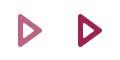

In [0]:
import requests

r = requests.get('https://vnexpress.net/')


In [0]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.prettify()[:500])


<!DOCTYPE html>
<html lang="vi" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   VnExpress - Báo tiếng Việt nhiều người xem nhất
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=100" http-equiv="X-UA-Compatible">
   <meta content="1547540628876392" property="fb:app_id"/>
   <link href="https://vnexpress.net" rel="canonical"/>
   <meta content="1800" http-equiv="REFRESH"/>
   <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
   <link href="//scdn.eclick.vn"


In [0]:

soup = get_url('https://vnexpress.net')

In [0]:
articles = soup.find_all('article', class_='list_news')
article = articles[5]
# article.a['href']
article.img

<img alt="Hàn Quốc phát hiện kháng thể vô hiệu hóa nCoV" class="vne_lazy_image" data-original="https://vcdn-vnexpress.vnecdn.net/2020/03/06/VNEAnti-1583457107-8155-1583457142_140x84.jpg" src="https://vcdn-vnexpress.vnecdn.net/2020/03/06/VNEAnti-1583457107-8155-1583457142_140x84.jpg"/>

In [0]:
d = {'title':'', 'link':'', 'image_url':'', 'description':''}
d['title'] = article.a.string
d['link'] = article.a['href']
d['description'] = article.p.text
d['image_url'] = article.img['src']

{'description': '',
 'image_url': '',
 'link': 'https://vnexpress.net/suc-khoe/nguoi-nhap-canh-tu-eu-campuchia-phai-khai-y-te-4064887.html',
 'title': '\nNgười nhập cảnh từ EU, Campuchia phải khai y tế '}

In [0]:
data = []
for article in articles:
    d = {'title':'', 'link':'', 'image_url':'', 'description':''}
    try:
        d['title'] = article.a.string
        d['link'] = article.a['href']
        d['description'] = article.p.text
        if article.img:
            d['image_url'] = article.img['src']
    except:
        pass
    data.append(d)

In [0]:
import requests
from bs4 import BeautifulSoup

def get_url(URL):
    """Get HTML from URL
    """
    r = requests.get(URL)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

def crawl_vnexpress(URL):
    soup = get_url(URL)
    articles = soup.find_all('article', class_='list_news')
    data = []
    for article in articles:
        d = {'title':'', 'link':'', 'image_url':'', 'description':''}
        try:
            d['title'] = article.a.string
            d['link'] = article.a['href']
            d['description'] = article.p.text
            if article.img:
                d['image_url'] = article.img['data-original']
        except:
            pass
        data.append(d)
    return data

[{'description': '\nTừ 0h ngày 7/3 khách nhập cảnh từ hoặc đi qua các nước thuộc Liên minh châu Âu (EU) và Campuchia, phải khai báo y tế.\n',
  'image_url': '',
  'link': 'https://vnexpress.net/suc-khoe/nguoi-nhap-canh-tu-eu-campuchia-phai-khai-y-te-4064887.html',
  'title': '\nNgười nhập cảnh từ EU, Campuchia phải khai y tế '},
 {'description': '\n7 trường thành viên Đại học Quốc gia TP HCM cho gần 70.000 sinh viên nghỉ học hết tháng 3 để phòng chống dịch Covid-19, sáng 6/3.\n',
  'image_url': '',
  'link': 'https://vnexpress.net/giao-duc/sinh-vien-dai-hoc-quoc-gia-tp-hcm-nghi-het-thang-3-4058531.html',
  'title': '\nSinh viên Đại học Quốc gia TP HCM nghỉ hết tháng 3 '},
 {'description': '\nThượng viện Mỹ thông qua gói hỗ trợ khẩn cấp 8,3 tỷ USD để ngăn chặn Covid-19, cao gấp hơn ba lần đề xuất do chính quyền Trump đưa ra.\xa0\n',
  'image_url': '',
  'link': 'https://vnexpress.net/the-gioi/thuong-vien-my-duyet-8-3-ty-usd-chong-covid-19-4064958.html',
  'title': '\nThượng viện Mỹ duyệ